```python
Data Hackerman Final Project
By Richard Adeyeye
18-April-2023
```

In [1]:
import pandas as pd
import requests
import json
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns
import folium


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### 1. File type manipulation and formatting

In [2]:
# Main working directory 
main_working_folder = os.getcwd()

In [3]:
# Data folder directory
data_folder = "data"

In [4]:
# Combining the paths
main_path = os.path.join(main_working_folder, data_folder)

In [5]:
# Getting the files list
files_list = os.listdir(main_path)

In [6]:
files_list

['csv_file.csv', 'json_file.json', 'txt_file.txt']

In [7]:
# Reading in csv file
csv_data = pd.read_csv(os.path.join(main_path, files_list[0]))

In [8]:
csv_data.head(1)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566,False,Can't believe I'm missing Love Island 😩,GB,twitter,1,51.57,0.46


In [9]:
# Reading in text file
# book_data = pd.read_csv(os.path.join(main_path, files_list[2]))
text_data = pd.read_csv(os.path.join(main_path, files_list[2]), sep=',', header=0)

In [10]:
text_data.head(1)

,author.properties.friends,author.properties.verified,location.longitude,author.properties.status_count,properties.sentiment,location.latitude,location.country,content.body,properties.platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter


In [11]:
# json_data = pd.read_json(os.path.join(main_path, files_list[1]))

with open(os.path.join(main_path, files_list[1])) as f:
    json_data = json.load(f)
json_data_df = pd.json_normalize(json_data)

In [12]:
json_data_df.head(1)

,author.properties.friends,author.properties.verified,author.properties.status_count,location.longitude,location.country,location.latitude,content.body,properties.sentiment,properties.platform
0,150,False,583,-1.45,GB,53.38,To everyone tryin to snapchat me fuck off I'm ugly,-1,twitter


### Combine the DataFrames

In [13]:
len(csv_data)

1000

In [14]:
len(text_data)

1000

In [15]:
len(json_data_df)

1000

In [16]:
csv_txt_data = pd.concat([csv_data, text_data])

In [17]:
len(csv_txt_data)

2000

In [18]:
csv_txt_json_data = pd.concat([csv_txt_data, json_data_df])

In [19]:
len(csv_txt_json_data)

3000

In [20]:
csv_txt_json_data.head(1)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46


### 2. Data exploration

In [21]:
csv_txt_json_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author.properties.friends       3000 non-null   object 
 1   author.properties.status_count  2999 non-null   float64
 2   author.properties.verified      3000 non-null   object 
 3   content.body                    2999 non-null   object 
 4   location.country                2999 non-null   object 
 5   properties.platform             2998 non-null   object 
 6   properties.sentiment            2999 non-null   float64
 7   location.latitude               2999 non-null   float64
 8   location.longitude              2999 non-null   float64
dtypes: float64(4), object(5)
memory usage: 234.4+ KB


In [22]:
csv_txt_json_data["properties.sentiment"].unique()

array([ 1., -1.,  0., nan])

In [23]:
# Removing the null, 'NaN' data from the "properties.sentiment" column
updated_data = csv_txt_json_data[csv_txt_json_data["properties.sentiment"].notnull()]

In [24]:
#csv_txt_json_data['author.properties.friends'] = csv_txt_json_data['author.properties.friends'].astype(int)
#csv_txt_json_data['author.properties.friends'] = pd.to_numeric(csv_txt_json_data['author.properties.friends'],errors = 'coerce')
updated_data['properties.sentiment'].unique()

array([ 1., -1.,  0.])

In [25]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author.properties.friends       2999 non-null   object 
 1   author.properties.status_count  2999 non-null   float64
 2   author.properties.verified      2999 non-null   object 
 3   content.body                    2999 non-null   object 
 4   location.country                2999 non-null   object 
 5   properties.platform             2998 non-null   object 
 6   properties.sentiment            2999 non-null   float64
 7   location.latitude               2999 non-null   float64
 8   location.longitude              2999 non-null   float64
dtypes: float64(4), object(5)
memory usage: 234.3+ KB


In [26]:
updated_data.describe().T

,count,mean,std,min,25%,50%,75%,max
author.properties.status_count,2999.00,35139.96,129182.54,2.00,3427.50,11435.00,30461.00,1702464.00
properties.sentiment,2999.00,-0.26,0.78,-1.00,-1.00,0.00,0.00,1.00
location.latitude,2999.00,52.75,1.66,49.19,51.50,52.20,53.69,58.17
location.longitude,2999.00,-1.61,1.64,-7.82,-2.68,-1.40,-0.18,1.40


#### Friends statistics

In [27]:
friends_df = updated_data['author.properties.friends'].value_counts().rename_axis('friends').to_frame('counts')
friends_df.head(5)

,counts
friends,
195,25
2457,23
521,11
190,11
0,10


#### Countries statistics

In [28]:
countries_df = updated_data['location.country'].value_counts().rename_axis('country code').to_frame('counts')

In [29]:
countries_df

,counts
country code,
GB,2991
GG,5
JE,2
IM,1


#### Sentiments count

In [30]:
sentiments_df = updated_data['properties.sentiment'].value_counts().rename_axis('sentiment').to_frame('counts')
sentiments_df

,counts
sentiment,
-1.00,1403
0.00,968
1.00,628


In [31]:
updated_data.shape

(2999, 9)

#### Platforms count

In [32]:
platforms_df = updated_data['properties.platform'].value_counts().rename_axis('platform').to_frame('counts')
platforms_df

,counts
platform,
twitter,2998


### Country vs Sentiment

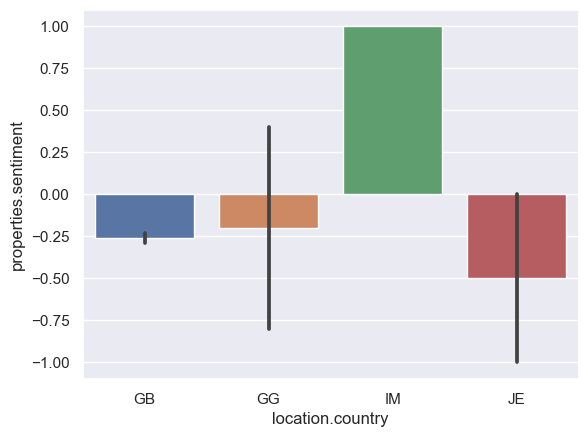

<Figure size 640x480 with 0 Axes>

In [33]:
sns.set_theme()
sns.barplot(data=updated_data, x='location.country', y='properties.sentiment')
plt.show()
plt.savefig("images\sentiment.png")

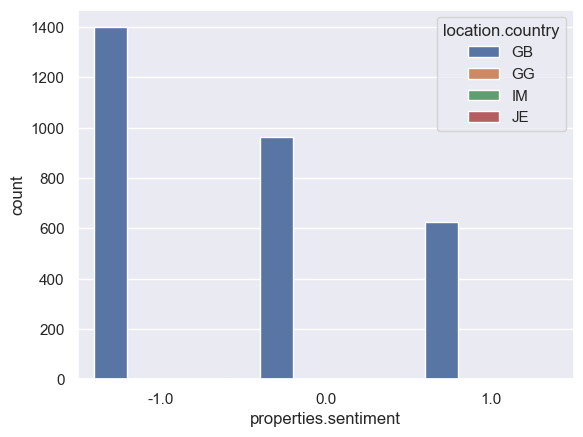

<Figure size 640x480 with 0 Axes>

In [34]:
# count plot properties.sentiment and author.properties.verified
sns.countplot(x='properties.sentiment',hue='location.country',data=updated_data)
plt.show()
plt.savefig("images\properties.png")

In [35]:
# get the location where sentiments on properties were sampled
location_data = updated_data[['location.latitude','location.longitude']]
area_map =  folium.Map(location=[58.17,1.40], zoom_start=5)
heat_map_data = [[row['location.latitude'],row['location.longitude']] for index, row in location_data.iterrows()]

In [36]:
from folium.plugins import HeatMap
# display map
HeatMap(heat_map_data, radius=5).add_to(area_map)

In [37]:
#display the map
area_map

### 3. Model creation

In [38]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

In [39]:
updated_data.shape

(2999, 9)

In [40]:
train_data, test_data = train_test_split(updated_data, test_size=0.33, random_state=42)

In [41]:
train_data.shape, test_data.shape

((2009, 9), (990, 9))

In [42]:
train_data.head(2)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
406,2280,15806.00,False,@ScottMaslenCrew just asked if Dot was Ginger omg hahaha,GB,twitter,-1.00,55.98,-3.71
840,616,4623.00,False,in love with my promise ring😇😇,GB,twitter,1.00,53.30,-0.80


In [43]:
test_data.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
376,282,2085.00,False,@Donforester Many established 1st generation immigrants want to restrict immigration. Many 2nd generation eg Irish more welcoming,GB,twitter,0.00,53.42,-2.92
932,51,12533.00,False,@smollyalexander thank u hunty,GB,twitter,1.00,53.37,-2.17
144,931,307.00,False,Hedge removal part one...!! @ Dalkeith https://t.co/slEBFhE0w9,GB,twitter,-1.00,55.87,-3.07
753,458,966.00,False,https://t.co/dvUtHRAPG4,GB,twitter,0.00,50.96,-0.56
51,680,3691.00,False,@MargevonMarge Blimey. You still haven't served enough time here? #EUref #Remain,GB,twitter,-1.00,53.55,-0.66


#### Training

In [44]:
%%time

save_path = 'artefacts/models_multiclass'
time_limit = 60
label = "properties.sentiment"

predictor = TabularPredictor(label=label, path=save_path, problem_type='multiclass').fit(test_data, time_limit=time_limit)

Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "artefacts/models_multiclass\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    990
Train Data Columns: 8
Label Column: properties.sentiment
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1127.57 MB
	Train Data (Original)  Memory Usage: 0.41 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting

CPU times: total: 45.2 s
Wall time: 32.4 s


### Evaluation

In [45]:
predictor.evaluate(test_data, silent=True)

{'accuracy': 0.8262626262626263,
 'balanced_accuracy': 0.7833361264733814,
 'mcc': 0.7273955003714492}

In [46]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesGini,0.92,0.62,0.14,0.08,0.78,0.14,0.08,0.78,1,True,9
1,RandomForestGini,0.92,0.62,0.16,0.09,0.86,0.16,0.09,0.86,1,True,6
2,ExtraTreesEntr,0.92,0.61,0.14,0.08,0.77,0.14,0.08,0.77,1,True,10
3,RandomForestEntr,0.92,0.61,0.13,0.08,0.78,0.13,0.08,0.78,1,True,7
4,LightGBMLarge,0.89,0.59,0.03,0.00,3.55,0.03,0.00,3.55,1,True,13
5,KNeighborsDist,0.88,0.38,0.02,0.03,0.02,0.02,0.03,0.02,1,True,2
6,XGBoost,0.85,0.62,0.10,0.00,1.49,0.10,0.00,1.49,1,True,11
7,WeightedEnsemble_L2,0.83,0.65,0.26,0.11,7.83,0.02,0.00,0.72,2,True,14
8,LightGBM,0.74,0.63,0.02,0.00,1.13,0.02,0.00,1.13,1,True,5
9,LightGBMXT,0.74,0.63,0.03,0.02,0.99,0.03,0.02,0.99,1,True,4


In [47]:
predictor.get_model_best()

'WeightedEnsemble_L2'

### Evaluation

```python
Features Importance
```

In [48]:
y_test = test_data[label]  # values to be predicted
test_data_nolab = test_data.drop(columns=[label])   

In [49]:
test_data_nolab.head(1)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,location.latitude,location.longitude
376,282,2085.00,False,@Donforester Many established 1st generation immigrants want to restrict immigration. Many 2nd generation eg Irish more welcoming,GB,twitter,53.42,-2.92


In [50]:
# `predictor.path` is another way to get the relative path needed to later load predictor.
save_model_predictor = TabularPredictor.load(save_path) 

In [51]:
# To find out the required feature columns to make predictions
save_model_predictor.features()

['author.properties.friends',
 'author.properties.status_count',
 'author.properties.verified',
 'content.body',
 'location.country',
 'location.latitude',
 'location.longitude']

### Prediction

In [52]:
y_pred = save_model_predictor.predict(test_data_nolab)

In [53]:
# returns a DataFrame that shows which probability corresponds to which class
y_pred_prob = save_model_predictor.predict_proba(test_data_nolab)

In [54]:
y_pred_prob[1:5]

,-1.00,0.00,1.00
932,0.42,0.33,0.25
144,0.52,0.30,0.18
753,0.17,0.72,0.10
51,0.50,0.27,0.23


In [55]:
predictor.get_model_best()

'WeightedEnsemble_L2'

In [56]:
y_pred[1:5]

932   -1.00
144   -1.00
753    0.00
51    -1.00
Name: properties.sentiment, dtype: float64

In [57]:
y_test[1:5]

932    1.00
144   -1.00
753    0.00
51    -1.00
Name: properties.sentiment, dtype: float64

In [58]:
# To show scores for other metrics, you can specify the extra_metrics argument when passing in test_data
save_model_predictor.leaderboard(test_data, extra_metrics=['accuracy', 'balanced_accuracy', 'log_loss'], silent=True)


,model,score_test,accuracy,balanced_accuracy,log_loss,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesGini,0.92,0.92,0.91,-0.36,0.62,0.14,0.08,0.78,0.14,0.08,0.78,1,True,9
1,RandomForestGini,0.92,0.92,0.91,-0.36,0.62,0.17,0.09,0.86,0.17,0.09,0.86,1,True,6
2,ExtraTreesEntr,0.92,0.92,0.91,-0.36,0.61,0.16,0.08,0.77,0.16,0.08,0.77,1,True,10
3,RandomForestEntr,0.92,0.92,0.91,-0.36,0.61,0.14,0.08,0.78,0.14,0.08,0.78,1,True,7
4,LightGBMLarge,0.89,0.89,0.86,-0.70,0.59,0.02,0.00,3.55,0.02,0.00,3.55,1,True,13
5,KNeighborsDist,0.88,0.88,0.87,-1.10,0.38,0.02,0.03,0.02,0.02,0.03,0.02,1,True,2
6,XGBoost,0.85,0.85,0.81,-0.54,0.62,0.03,0.00,1.49,0.03,0.00,1.49,1,True,11
7,WeightedEnsemble_L2,0.83,0.83,0.78,-0.71,0.65,0.27,0.11,7.83,0.02,0.00,0.72,2,True,14
8,LightGBM,0.74,0.74,0.68,-0.74,0.63,0.02,0.00,1.13,0.02,0.00,1.13,1,True,5
9,LightGBMXT,0.74,0.74,0.68,-0.69,0.63,0.02,0.02,0.99,0.02,0.02,0.99,1,True,4


In [59]:
# The predictor also remembers what metric predictions should be evaluated with
perf = save_model_predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred_prob)


Evaluation: accuracy on test data: 0.8262626262626263
Evaluations on test data:
{
    "accuracy": 0.8262626262626263,
    "balanced_accuracy": 0.7833361264733814,
    "mcc": 0.7273955003714492
}


In [60]:
# Alternatively since the label columns remains in the test_data DataFrame 
perf = save_model_predictor.evaluate(test_data)

Evaluation: accuracy on test data: 0.8262626262626263
Evaluations on test data:
{
    "accuracy": 0.8262626262626263,
    "balanced_accuracy": 0.7833361264733814,
    "mcc": 0.7273955003714492
}


###  Input for Prediction

In [61]:
updated_data.head(1)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46


In [62]:
updated_data['content.body'].unique()

array(["Can't believe I'm missing Love Island 😩",
       "Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable",
       'How many times does he wonna say the phrase "i deal with shit" #LoveIsland',
       ..., '#NP Shola Ama - Loving My Baby',
       'Could not have had a worse couple days. Failed MOT, lost my passport, and now just found out I sent £300 for my Napa Accom to the wrong acc.',
       "@FHPReading Hi guys, we're from Reading and would love to take your branding to a new level. Get in touch and we'll chat more! #snapchat"],
      dtype=object)

In [63]:
updated_data['properties.sentiment'].unique()

array([ 1., -1.,  0.])

#### Create Sample Data

In [64]:
sample_data_dict = {
    
    "author.properties.friends": 114,
    "author.properties.status_count": 1377,
    "author.properties.verified": "True",
    "content.body": "Can't believe I'm missing Love Island 😩",
    "location.country": 'NG',
    "properties.platform": 'facebook',
    "location.latitude": 52.96974444,
    "location.longitude": -1.172266
    
}

In [65]:
sample_data = pd.DataFrame([sample_data_dict])

In [66]:
sample_data.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,location.latitude,location.longitude
0,114,1377,True,Can't believe I'm missing Love Island 😩,NG,facebook,52.97,-1.17


In [67]:
save_model_predictor.predict(sample_data)

0   -1.00
Name: properties.sentiment, dtype: float64

In [68]:
save_model_predictor.predict(sample_data)[0]

-1.0